# ДЗ-4

В этой работе вам предстоит закрепить основные команды взаимодействия с открытыми API.

За это задание можно получить до 8 баллов (включительно).

Код можно писать в нескольких ячейках.

## Задание "Карточные фокусы"

В этом задании вам предстоит взаимодействите с открытым API: `https://deckofcardsapi.com`

Основные эндпойнты:
1. Создать стопку из `N` колод кард по 52 карты каждая

`https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=N` (вместо `N` нужно вставить свое число)

После вызова метода будет возвращен `json`, из которого основной информацией будет значение по ключу `deck_id`


Пример: `get` запроса `"https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=3"` вернет
```json
{
    "success": true,
    "deck_id": "lcww1uui6bf6",
    "remaining": 156,
    "shuffled": true
}
```


2. Метод извлечения `N` карт из созданной колоды по `deck_id`


Пример: `get` запрос `https://deckofcardsapi.com/api/deck/lcww1uui6bf6/draw/?count=2` вернет
```json
{
    "success": true,
    "deck_id": "lcww1uui6bf6",
    "cards": [
        {
            "code": "7H",
            "image": "https://deckofcardsapi.com/static/img/7H.png",
            "images": {
                "svg": "https://deckofcardsapi.com/static/img/7H.svg",
                "png": "https://deckofcardsapi.com/static/img/7H.png"
            },
            "value": "7",
            "suit": "HEARTS"
        },
        {
            "code": "3C",
            "image": "https://deckofcardsapi.com/static/img/3C.png",
            "images": {
                "svg": "https://deckofcardsapi.com/static/img/3C.svg",
                "png": "https://deckofcardsapi.com/static/img/3C.png"
            },
            "value": "3",
            "suit": "CLUBS"
        }
    ],
    "remaining": 154
}
```

Обратите внимание, после извлечения карты не возвращаются в колоду.

### Описание структуры JSON

Основные поля `json` при создании колоды:
* remaining - количество карт, которые остались в колоде (уменьшается при извлечении)
* deck_id - идентификатор созданной колоды
* shuffled - флаг того, что колода перемешана или нет
* success - флаг того, что метод все завершилось корректно

При вызове метода на извлечение карт из колоды добавляются поля:
* cards - список извлеченных карт с описанием

Описание карты:
* code - код карты (составлен из номинала и первой буквы масти)
* image - ссылка на изображение в .png формате
* images - список других форматов изображений (.png и .svg)
* value - значение карты
* suit - масть

### Задача 1 (1 балл)

Напишите фупрограмму, которая запрашивает по API создание колоды из четырех мастей. Извлеките идентификатор колоды для дальнейшей работы и выведите структуру `json`, которая вам поступает в ответ, а таже статус-код.

In [ ]:
# ваш код здесь
import json
import requests
url = "https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=1"
response = requests.get(url)
data = response.json()
deck_id = 1
deck_id = data.get('deck_id')
print(deck_id)

### Задача 2.1 (1 балл)

Извлеките из колоды десять карт. Рекомендуется использовать такой способ создания url ссылки, чтобы изменять отдельно параметры запроса

```python
deck_id = data['deck_id']
number_of_cards = 10

url = f"https://deckofcardsapi.com/api/deck/{deck_id}/draw/?count={number_of_cards}"
```

In [ ]:
# ваш код здесь
import json
import requests
url = "https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=1"
response = requests.get(url)
data = response.json()
deck_id = 1
deck_id = data.get('deck_id')
deck_id = data['deck_id']
number_of_cards = 10
draw_url = f"https://deckofcardsapi.com/api/deck/{deck_id}/draw/?count={number_of_cards}"
draw_response = requests.get(draw_url)
draw_data = draw_response.json()
cards = 1
cards = draw_data['remaining']
print('осталось ' + cards)

### Задача 2.2 (2 балла)

Среди всех карт в `cards` соберите информацию о том, сколько карт каждой масти было вытянуто. Выведите это в консоль.

In [ ]:
# ваш код здесь
import json
import requests
url = "https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=1"
response = requests.get(url)
data = response.json()
deck_id = 1
deck_id = data.get('deck_id')
deck_id = data['deck_id']
number_of_cards = 10
draw_url = f"https://deckofcardsapi.com/api/deck/{deck_id}/draw/?count={number_of_cards}"
draw_response = requests.get(draw_url)
draw_data = draw_response.json()
hearts = []
clubs = []
spades = []
diamonds = []
for i in draw_data['cards']:
    if i['suit'] == 'HEARTS':
        hearts.append(i['value'])
    if i['suit'] == 'CLUBS':
      clubs.append(i['value'])
    if i['suit'] == 'SPADES':
      spades.append(i['value'])
    if i['suit'] == 'DIAMONDS':
      diamonds.append(i['value'])
print('hearts: ' + ' '.join(hearts))
print('clubs: ' + ' '.join(clubs))
print('spades: ' + ' '.join(spades))
print('diamondss: ' + ' '.join(diamonds))

### Задача 2.3 (1 балл)

Определите наибольший номинал среди вытащенныз карт и ее масть.

In [ ]:
# ваш код здесь
import json
import requests
url = "https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=1"
response = requests.get(url)
data = response.json()
deck_id = 1
deck_id = data.get('deck_id')
deck_id = data['deck_id']
number_of_cards = 10
draw_url = f"https://deckofcardsapi.com/api/deck/{deck_id}/draw/?count={number_of_cards}"
draw_response = requests.get(draw_url)
draw_data = draw_response.json()
hearts = []
clubs = []
spades = []
diamonds = []
def cnt(s):
    if s == "KING":
      return 13
    elif s == "QUEEN":
      return 12
    elif s == "JACK":
      return 11
    elif s == "ACE":
      return 1
    else:
      return int(s)
for i in draw_data['cards']:
    if i['suit'] == 'HEARTS':
        hearts.append(cnt(i['value']))
    if i['suit'] == 'CLUBS':
      clubs.append(cnt(i['value']))
    if i['suit'] == 'SPADES':
      spades.append(cnt(i['value']))
    if i['suit'] == 'DIAMONDS':
      diamonds.append(cnt(i['value']))
hearts.append(0)
spades.append(0)
clubs.append(0)
diamonds.append(0)
mx = max(max(hearts), max(spades), max(clubs), max(diamonds))
if max(hearts) == mx:
  print('hearts:', mx)
if max(clubs) == mx:
  print('clubs:', mx)
if max(spades) == mx:
  print('spades:', mx)
if max(diamonds) == mx:
  print('diamonds:', mx)

### Задача 2.4 (2 балла)

Повторите еще десять извлечений по 10 карт. Создайте датафрейм в `pandas`, в котором столбцами будут названия мастей, а в строках - количество вытянутых карт каждой масти соответственно.

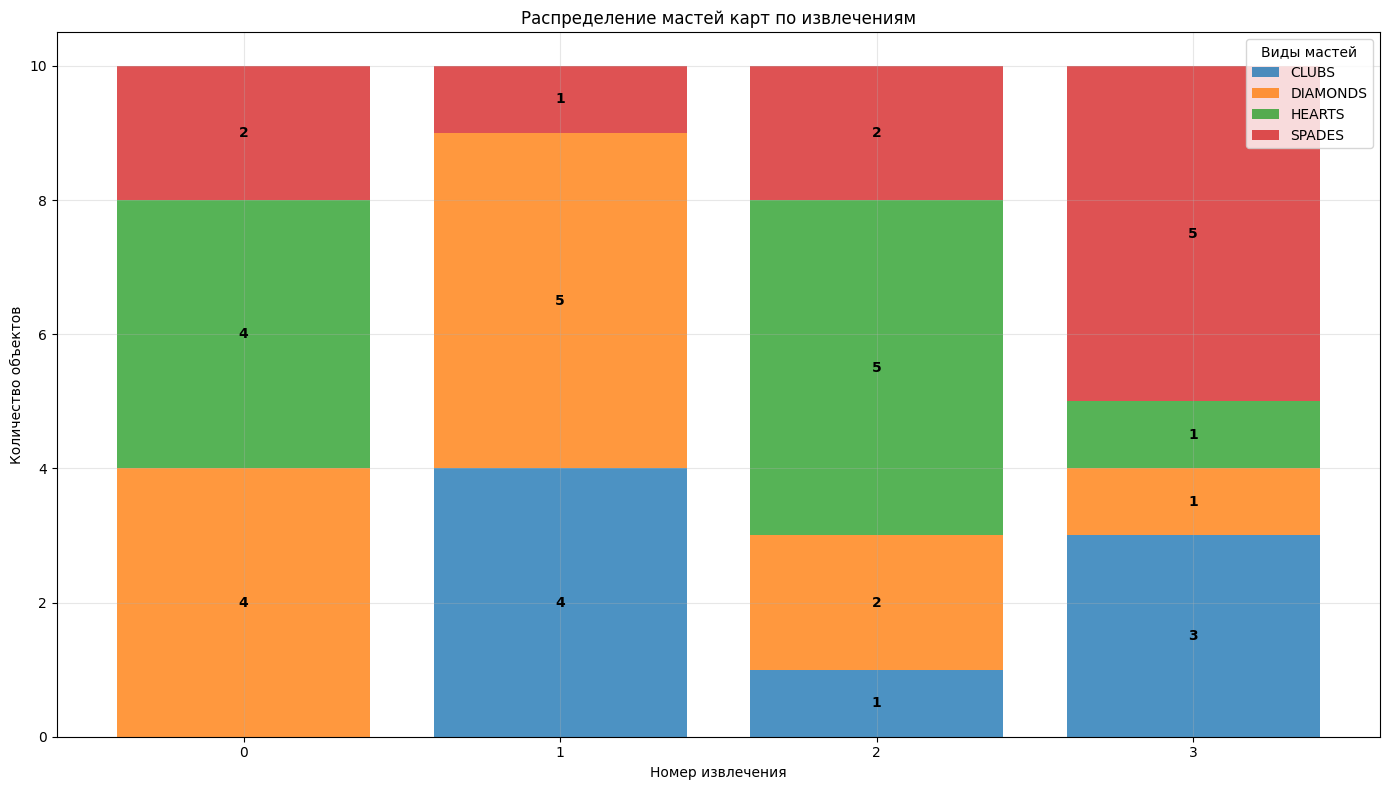

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Достаточно в коде поменять демонстрационный датафрейм на тот,
# который создадите вы.

df = pd.DataFrame({
    'CLUBS': [0, 4, 1, 3],
    'DIAMONDS': [4, 5, 2, 1],
    'HEARTS': [4, 0, 5, 1],
    'SPADES': [2, 1, 2, 5]
})
object_types = df.keys()

# Построение stacked bar chart
plt.figure(figsize=(14, 8))

x = df.index
bottom = np.zeros(len(df))

for i, obj_type in enumerate(object_types):
    plt.bar(x, df[obj_type], bottom=bottom, label=obj_type, alpha=0.8)

    # Добавляем подписи значений
    for j, (measurement, value) in enumerate(zip(x, df[obj_type])):
        if value > 0:
            plt.text(measurement, bottom[j] + value/2, str(value),
                    ha='center', va='center', fontweight='bold', fontsize=10)

    bottom += df[obj_type].values

plt.xlabel('Номер извлечения')
plt.ylabel('Количество объектов')
plt.title('Распределение мастей карт по извлечениям')
plt.legend(title='Виды мастей')
plt.grid(True, alpha=0.3)
plt.xticks(x)

plt.tight_layout()
plt.show()

### Задача 2.5 (1 балл)

На основе данный в предыдущем пункте, постройте график частоты встречаемости для каждой масти по измерениям, т.е. поделите количество на 10 и построить графики.

In [ ]:
# ваш код здесь
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Достаточно в коде поменять демонстрационный датафрейм на тот,
# который создадите вы.

df = pd.DataFrame({
    'CLUBS': [0, 4, 1, 3],
    'DIAMONDS': [4, 5, 2, 1],
    'HEARTS': [4, 0, 5, 1],
    'SPADES': [2, 1, 2, 5]
})

x = np.linspace(1, 4, 4)
y1 = df['CLUBS']
y2 = df['DIAMONDS']
y3 = df['HEARTS']
y4 = df['SPADES']
plt.plot(x, y1, color='blue', label='CLUBS')
plt.plot(x, y2, color='black', label='DIAMONDS')
plt.plot(x, y3, color='red', label='HEARTS')
plt.plot(x, y4, color='orange', label='SPADES')
plt.xlabel('Номер извлечения')
plt.ylabel('Количество объектов')
plt.title('Распределение мастей карт по извлечениям')
plt.legend(title='Виды мастей')
plt.show()